## Regular Expression

- search pattern
    - searching
    - replacing
    - parsing text
    
    with complex patterns of characters
    
- Why use RE?
    - string searching
    - input validation
    
    
- But, There is a learning curve
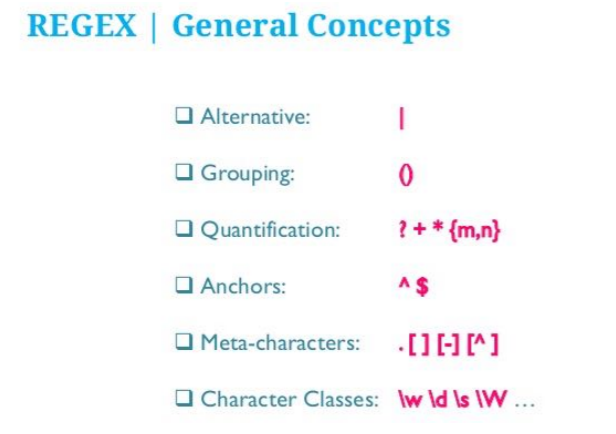

- Meta characters
    -  . : anycharacter ... 키보드에서 표현할 수 있는 모든 문자 하나!
        - a.b? ... aab, a0b 
    - *(asterisk) : 0번 이상 반복!
        - ab*c ... ac,abc, abbbbbbbc
    - +(plus) : 1번 이상 반복
        - ab+c ... ~~ac~~, abc, abbbbbc
    - {n | min, | min, max}(curly braces) : n번 반복 , min부터 끝, min부터 max
        - {0,}=*, {1,}=+
        - ab{1}c, ab{2,6}c ... a+b(1번 반복, 2번~6번) +c
    - ?(question) : boolean
        - ab?c, b{0,1}
        - a+b(1개 있거나, 없거나) +c
        - ac, abc, ~~abbbc~~
    - ^x : 문자열이 x로 시작
    - x$ : 문자열이 x로 끝남
    - [](square braket) : [abc] : a,b or c
    - - : 어디부터 어디까지 : [a-z]
    - ^ : 어디부터 어디까지 제외 : [^a-z] : a부터 z까지 제외
    - \w : 알파벳+숫자+_를 찾음
    - \W : 알파벳+숫자+_를 빼고 찾음
    - \s : 공백문자를 찾음
    - \S : 공백문자 빼고 찾음
    - \b : 문자와 공백사이의 문자를 찾음
    - \B : 공백문자가 아닌 것을 찾음

Test : stackoverflow
    - s.*o : stackoverflo ... greedy re
    - s.*?o : stacko ... lazy re
    - py(pi|tho(nic|n)) -> pypi or python or pythonic
    - colou?r -> color or colour
    - 81*5 -> 85 or 815 or 8111111111115
    - 81+5 -> 815 or 81111115
    - go{2,3}gle -> google or goooogle
    - go{2,} -> goo or goooooooo
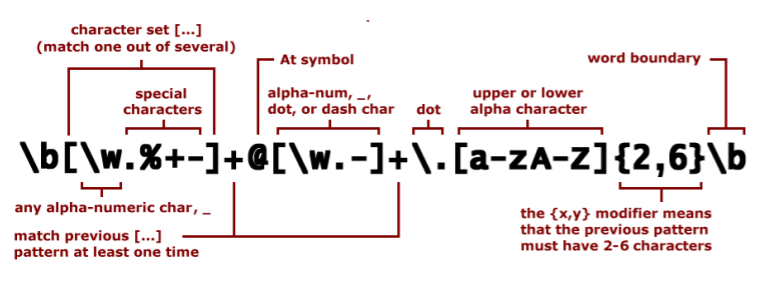

@전까지는 아이디, @후는 도메인\.(이 아이는 .이란 소리)[a-zA-Z] (영어만)

In [2]:
#<h1 style="color:red"> Heading</h1>

html, xml tag거르기

<([A-Z][A-Z0-9]*)[^>]*>(.*?)<\/\1>

(^*?) <

은 중간에 뭐가 들어가고 <를 만나면 그만하라!

000-0000-0000

000 0000 0000

[0-9]{2,3}[\s\-][0-9]{2,3}\-[0-9]{2,3}

[\s\-] 이 친구 같은 경우 공백이거나, -이거나

+00-00-0000-0000

+00 00 0000 0000

([\+]?[0-9]{2}[\s\-]?)?0?1[0-9]{1}[\s\-]?[0-9]{4}[\s\-]?[0-9]{4}


In [3]:
import re

1. searching :중간부터 찾음
2. match : 처음부터 찾음
3. re.split(문자열 스트림) 특정 패턴에 따라 자르겠다.

In [10]:
content = "Hello world"

In [13]:
print(re.search("w",content))

<_sre.SRE_Match object; span=(6, 7), match='w'>


In [14]:
print(re.match("w",content))

None


In [16]:
p = re.compile('(ABC)+')

In [18]:
m = p.search("ABCABCABC OK?")
print(m.group())

ABCABCABC


In [19]:
p = re.compile(r"\bclass\b")
print(p.search('no class al all'))

<_sre.SRE_Match object; span=(3, 8), match='class'>


## group

0에는 전체, 1,2로 구분이 된다.

In [21]:
m = re.match(r"(\w+) (\w+)", "Isaac Newton, physicist")

In [22]:
print(m.group(0))

Isaac Newton


In [23]:
print(m.group(1))

Isaac


In [24]:
print(m.group(2))

Newton


In [26]:
print(m.group(1,2))

('Isaac', 'Newton')


In [27]:
p = re.compile(r"(\w+) (\w+)")

In [28]:
m = p.search("Isaac Newton, physicist")
print(m.group())

Isaac Newton


In [29]:
p.sub("\g<2> \g<1>", "Isaac Newton, physicist")

'Newton Isaac, physicist'

.*.[@].*[.]*(com|net)

으로

park@naver.com

kim@daum.net

lee@myhome.co.kr

인데, com이나 net으로 된 것만 걸러낼 수 있다!

park 010-9999-9988

kim 010-9909-7789

lee 010-8789-7768

을 핸드폰 번호 뒷자리인 숫자 4개를 ####로 바꾸는 프로그램

In [1]:
import re

In [2]:
pattern=r'([a-z]+[\s\-]+[0-9]{3}.?[0-9]{4}.?[\s\-])([0-9]{4})'

In [3]:
content='park 010-9999-9988'

In [6]:
re.search(pattern,content).group(0)

'park 010-9999-9988'

In [9]:
re.search(pattern,content).group(1)

'park 010-9999-'

In [8]:
re.search(pattern,content).group(2)

'9988'

In [11]:
type(re.search(pattern,content).group(1))

str

In [12]:
re.search(pattern,content).group(1)+'####'

'park 010-9999-####'

In [10]:
re.search(pattern,content).group(1).join("####")

'#park 010-9999-#park 010-9999-#park 010-9999-#'

In [48]:
re.sub(r'[0-9]',("####"),re.search(pattern,content).group(2))

'################'

In [49]:
re.search(pattern,content).group(2)

'9988'

In [52]:
content.replace(re.search(pattern,content).group(2),"####")

'park 010-9999-####'

번호가 같은 아이들은 어떻게 할 것인가??